In [1]:
import pandas as pd
import numpy as np
import sys
import math
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import seaborn as seabornInstance 
from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score
import operator

In [2]:
# data = pd.read_csv('result_data_num.csv')
data = pd.read_csv('result_data_cap.csv')
# data = pd.read_csv('result_data_refill.csv')

In [3]:
data

,test_number,num,cap,refill,K,num_neg,num_pos,sum_neg,sum_pos,total_fun,running_time
0,0,60000,100,20,100000,29773,30221,443230651,456669531,-794203180,1456
1,1,60000,100,20,100000,30126,29865,453803001,445974045,-865500490,1447
2,2,60000,100,20,100000,29780,30212,443439090,456397578,-805014507,1496
3,3,60000,100,20,100000,29888,30104,446661216,453140460,-829980884,1454
4,4,60000,100,20,100000,30018,29976,450555171,449295276,-841405192,1448
5,5,60000,100,20,100000,29890,30100,446720995,453020050,-805313732,1457
6,6,60000,100,20,100000,29881,30113,446452021,453411441,-825321059,1452
7,7,60000,100,20,100000,29987,30002,449625078,450075003,-798126858,1456
8,8,60000,100,20,100000,30049,29945,451486225,448366485,-817605776,1449
9,9,60000,100,20,100000,29991,30004,449745036,450135010,-823410810,1450


In [4]:
# x = data['num']
# y = data['running_time']

# plt.scatter(x,y)

# lin_reg = stats.linregress(x, y)
# plt.plot(x, x*lin_reg.slope+lin_reg.intercept, 'r-')

# plt.title('running_time vs num\n cap = 500 and refill = 20')
# plt.xlabel('num')
# plt.ylabel('running_time (msec)')
# plt.show()

# print("slope = ", lin_reg.slope)
# print("intercept = ", lin_reg.intercept)
# print('r value between log(cap) and running_time: ', 
#       stats.linregress(x, y).rvalue.round(10))
# print('r-sqr is: ', ((stats.linregress(x, y).rvalue)**2).round(10))

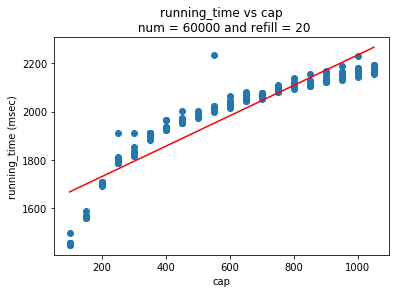

slope =  0.6315578947368421
intercept =  1603.5542105263157
r value between log(cap) and running_time:  0.9154462557
r-sqr is:  0.8380418471


In [5]:
x = data['cap']
y = data['running_time']

plt.scatter(x,y)

lin_reg = stats.linregress(x,y)
plt.plot(x, x*lin_reg.slope+lin_reg.intercept, 'r-')

plt.title('running_time vs cap\n num = 60000 and refill = 20')
plt.xlabel('cap')
plt.ylabel('running_time (msec)')
plt.show()

print("slope = ", lin_reg.slope)
print("intercept = ", lin_reg.intercept)
print('r value between log(cap) and running_time: ', 
      stats.linregress(x, y).rvalue.round(10))
print('r-sqr is: ', ((stats.linregress(x, y).rvalue)**2).round(10))

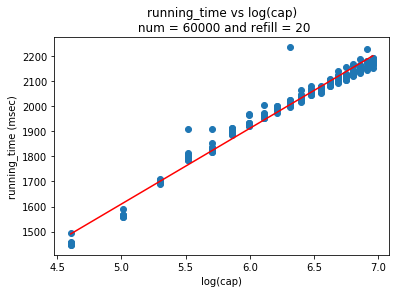

slope =  301.9356755934919
intercept =  100.42654607686381
r value between log(cap) and running_time:  0.9876272769
r-sqr is:  0.9754076381


In [6]:
x = np.log(data['cap'])
# data['log_cap'] = x
y = data['running_time']

plt.scatter(x,y)

lin_reg = stats.linregress(x,y)
plt.plot(x, x*lin_reg.slope+lin_reg.intercept, 'r-')

plt.title('running_time vs log(cap)\n num = 60000 and refill = 20')
plt.xlabel('log(cap)')
plt.ylabel('running_time (msec)')
plt.show()

print("slope = ", lin_reg.slope)
print("intercept = ", lin_reg.intercept)
print('r value between log(cap) and running_time: ', 
      stats.linregress(x, y).rvalue.round(10))
print('r-sqr is: ', ((stats.linregress(x, y).rvalue)**2).round(10))

In [7]:
# x = data['refill']
# y = data['running_time']

# plt.scatter(x,y)
# lin_reg = stats.linregress(x, y)
# plt.plot(x, x*lin_reg.slope+lin_reg.intercept, 'r-')

# plt.title('running_time vs refill\n num = 60000 and cap = 600')
# plt.xlabel('refill')
# plt.ylabel('running_time (msec)')
# plt.show()

# print("slope = ", lin_reg.slope)
# print("intercept = ", lin_reg.intercept)
# print('r value between refill and running_time: ', stats.linregress(x, y).rvalue.round(10))
# print('r-sqr is: ', ((stats.linregress(x, y).rvalue)**2).round(10))

In [8]:
# https://towardsdatascience.com/polynomial-regression-bbe8b9d97491

# tmp_data = data[['refill', 'running_time']]
# x = x[:, np.newaxis]
# y = y[:, np.newaxis]

# polynomial_features = PolynomialFeatures(degree=4)
# x_poly = polynomial_features.fit_transform(x)

# model = LinearRegression(fit_intercept=False)
# model.fit(x_poly, y)
# y_poly_pred = model.predict(x_poly)

# rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
# r2 = r2_score(y,y_poly_pred)
# # print(rmse)
# # print(r2)

# plt.scatter(x, y, s=10)
# # sort the values of x before line plot
# sort_axis = operator.itemgetter(0)
# sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
# x, y_poly_pred = zip(*sorted_zip)
# plt.plot(x, y_poly_pred, color='m')

# plt.title('running_time vs refill\n num = 60000 and cap = 600')
# plt.xlabel('refill')
# plt.ylabel('running_time (msec)')
# plt.show()

# print('r-sqr is: ', r2)

# name = polynomial_features.get_feature_names(tmp_data.columns)
# value = model.coef_.reshape((1,5))

# function = pd.DataFrame(value, columns = name)
# # print("The polynomial function is: ")
# # print("Y = 2.16281187e+03 - 8.83801951e+00*X + 2.90713623e-02*X^2 - 4.19581696e-05*X^3 + 2.14083423e-08*X^4")
# function

In [9]:
# x = data['refill']
# y = data['running_time']



# plt.scatter(x,y)

# # lin_reg = stats.linregress(x, y)
# plt.plot(x,2.16281187e+03 + -8.83801951e+00*x + 2.90713623e-02*x**2 + -4.19581696e-05*x**3 + 2.14083423e-08*x**4, 'r-')

# plt.title('running_time vs refill\n num = 60000 and cap = 600')
# plt.xlabel('refill')
# plt.ylabel('running_time (msec)')
# plt.show()